In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

In [15]:
# Read in data into a dataframe
data = pd.read_csv('data/full.csv')

# Display top of dataframe
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,785.0,"Doherty, Mr. William John (aka ""James Moran"")",22.0,"Cork, Ireland",Queenstown,New York City,NaN,NaN,3.0
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,200.0,"McCarthy, Mr. Timothy J.",54.0,"Dorchester, Massachusetts, US",Southampton,"Dorchester, Massachusetts, US",NaN,175MB,1.0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1108.0,"Pålsson, Master Gösta Leonard",2.0,"Bjuv, Skåne, Sweden",Southampton,"Chicago, Illinois, US",NaN,NaN,3.0
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,902.0,"Johnson, Mrs. Elisabeth Vilhelmina (née Berg)",26.0,"St. Charles, Illinois, US",Southampton,"St. Charles, Illinois, US",15,NaN,3.0
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,520.0,"Nassr Allah, Mrs. Adal (née Akim)[62][77]",14.0,"Zahlé, Lebanon, Ottoman Empire",Cherbourg,"Cleveland, Ohio, US",?,NaN,2.0


In [3]:
# See the column data types and non-missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

In [4]:
data = data.drop(['Age', 'Name', 'Name_wiki', 'Body', 'Lifeboat', 'Cabin', 'Ticket', 'Embarked', 'WikiId', 'Class'], axis='columns')

In [5]:
data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Age_wiki,Hometown,Boarded,Destination
0,1,0.0,3,male,1,0,7.2500,22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada"
1,2,1.0,1,female,1,0,71.2833,35.0,"New York, New York, US",Cherbourg,"New York, New York, US"
2,3,1.0,3,female,0,0,7.9250,26.0,"Jyväskylä, Finland",Southampton,New York City
3,4,1.0,1,female,1,0,53.1000,35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US"
4,5,0.0,3,male,0,0,8.0500,35.0,"Birmingham, West Midlands, England",Southampton,New York City


In [6]:
data.to_csv(r'full_clean.csv', index = False)

In [7]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [8]:
missing_values_table(data)

Your selected dataframe has 11 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
Survived,418,31.9
Age_wiki,7,0.5
Hometown,5,0.4
Boarded,5,0.4
Destination,5,0.4
Fare,1,0.1


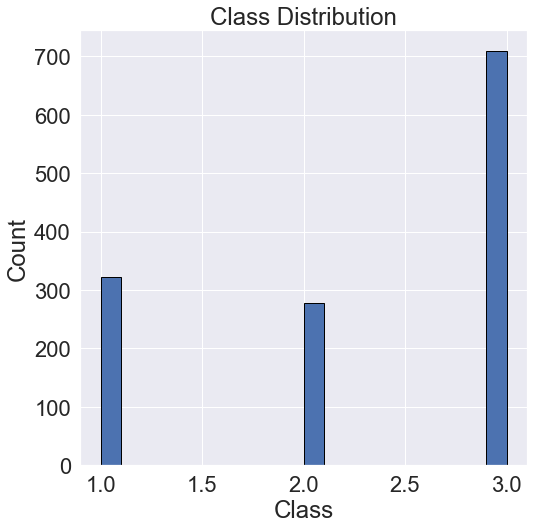

In [9]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(data['Pclass'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Class'); 
plt.ylabel('Count'); plt.title('Class Distribution');

In [16]:
survivor_data = data.groupby(['Age_wiki'])
survived = survivor_data.count()
survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
Age_wiki,,,,,,,,,,,,,,,,,,,,
0.17,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1
0.33,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1
0.42,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1
0.58,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1
0.75,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67.00,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
69.00,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,0,1
70.00,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
